<a href="https://colab.research.google.com/github/AliTavakoli2001/Deep-Learning-Project/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Add the necessary Frameworks and Libraries**





In [ ]:
import tensorflow as TF
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import numpy as NP
import matplotlib.pyplot as plt

---
# **Load Mnist Data**


> **Why unlabeled data?**

In an autoencoder, we only need unlabeled data because it is an unsupervised learning model. The goal of an autoencoder is to learn the underlying patterns of the data and reconstruct the input data without requiring any labels. It focuses on minimizing the reconstruction error rather than predicting labels.







In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step




---


# **Normalize data to range [0,1]**


> **Normalizing Image Data for Better Model Performance**

The two lines of code normalize the image data by converting pixel values from the range [0, 255] to [0, 1]. This is done by first converting the data type to float32 and then dividing by 255. This normalization helps improve model performance and training stability by ensuring the input features are on a similar scale.



In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


---

# Flatten images

The `reshape` function converts each 2D image into a 1D vectorby flattening the pixel values row-wise. This transformation is necessary because fully connected neural networks expect 1D input vectors instead of 2D matrices.

In [ ]:
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



---


# Define Autoencoder model


1. The input layer `Input(shape=(784,))` takes a **flattened 28×28 image** as a **1D vector** with **784 values**.  
2. The **encoder layer** `Dense(32, activation='relu')` reduces the input **from 784 to 32 dimensions**, extracting key features.  
3. The **decoder layer** `Dense(784, activation='sigmoid')` reconstructs the original **784-dimensional** image from the **compressed 32-dimensional** representation.  
4. **ReLU** helps retain important features in encoding, while **sigmoid** ensures output values remain between **0 and 1**, matching the normalized pixel range.  

In [ ]:
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)



---


# Compile model

This line compiles the autoencoder using the **Adam optimizer** for efficient and adaptive learning and **binary cross-entropy loss**, which is suitable for pixel values (0 to 1) and helps minimize reconstruction error.

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# Train the autoencoder

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3786 - val_loss: 0.1862
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1786 - val_loss: 0.1528
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1486 - val_loss: 0.1336
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1318 - val_loss: 0.1212
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1202 - val_loss: 0.1126
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1124 - val_loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1068 - val_loss: 0.1024
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1028 - val_loss: 0.0991
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0996 - val_loss: 0.0968
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0975 - val_loss: 0.0952
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0964 - val_loss: 0.0943
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

# Encode and decode some test images

In [ ]:
encoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


# Visualizing the results

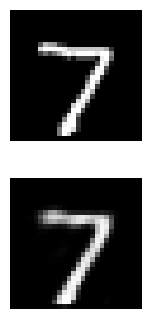

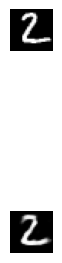

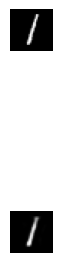

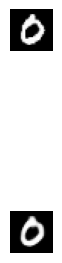

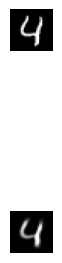

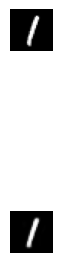

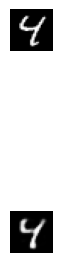

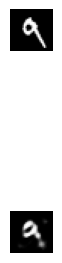

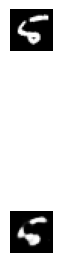

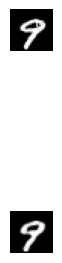

In [ ]:
def plot_results(x_test, decoded_imgs, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
         # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.show()


plot_results(x_test, encoded_imgs)

# Saving model weights

In [ ]:
autoencoder.save_weights('my_autoencoder_weights.weights.h5')